In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import platform

from matplotlib import pyplot as plt
from matplotlib import font_manager, rc
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
power_data = pd.read_excel('시도별_용도별.xls')
print(power_data.shape)

(19, 28)


In [3]:
power_data.head()

,구분,주거용,공공용,서비스업,업무용합계,농림어업,광업,제조업,식료품제조,"섬유,의류",...,기타기계,사무기기,전기기기,"영상,음향",자동차,기타운송,가구및기타,재생재료,산업용합계,합계
0,강원,1940933,1400421,6203749,7604170,607139,398287,6002286,546621,13027,...,35063,2019,38062,43986,113448,108629,12872,3418,7007712,16552816
1,개성,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,경기,16587710,5533662,33434551,38968213,2371347,317263,56603327,2544420,2109963,...,3613798,317244,1040171,24519644,2977165,67594,1833112,133041,59291937,114847859
3,경남,4260988,1427560,8667737,10095297,2141813,95989,18053778,932743,346974,...,1902913,8070,924235,534196,2156059,2048646,262523,47662,20291580,34647864
4,경북,3302463,1578115,8487402,10065517,1747462,224568,30115601,566071,3780171,...,782570,14468,750786,4174971,2356890,123935,60280,77104,32087631,45455611


In [4]:
power_data.tail()

,구분,주거용,공공용,서비스업,업무용합계,농림어업,광업,제조업,식료품제조,"섬유,의류",...,기타기계,사무기기,전기기기,"영상,음향",자동차,기타운송,가구및기타,재생재료,산업용합계,합계
14,전북,2326183,1096968,4910318,6007286,1415004,85300,12965875,1459217,731651,...,159699,7240,130692,420005,859741,70980,16175,99003,14466179,22799647
15,제주,782601,301727,2308732,2610459,1364930,14019,241537,155987,3497,...,1167,0,771,0,773,532,1743,743,1620486,5013545
16,충남,2691823,1089613,7164439,8254052,1928066,248313,37057955,1137035,269998,...,611925,12208,428906,10953811,2526658,33766,53804,19725,39234334,50180209
17,충북,2027281,1267140,4804638,6071778,721131,139856,15883448,1152073,333846,...,366871,23076,1125141,4103832,603349,82496,513501,46038,16744435,24843494
18,합계,64576423,22204112,134748546,156952658,15373994,1347957,252942540,10735833,11247578,...,10504640,487262,5763846,47655808,17790147,4311878,3396006,559909,269664491,491193571


In [5]:
power_data.columns ## 판다스 데이터의 열 제목만

Index(['구분', '주거용', '공공용', '서비스업', '업무용합계', '농림어업', '광업', '제조업', '식료품제조',
       '섬유,의류', '목재,나무', '펄프,종이', '출판,인쇄', '석유,화확', '의료,광학', '요업', '1차금속',
       '조립금속', '기타기계', '사무기기', '전기기기', '영상,음향', '자동차', '기타운송', '가구및기타', '재생재료',
       '산업용합계', '합계'],
      dtype='object')

In [6]:
power_data.index
#power_data.values

RangeIndex(start=0, stop=19, step=1)

In [7]:
## 구분 열을 인덱스로 지정
power = power_data.set_index('구분')
# 변수에 저장하지 않으면 원본 데이터 변경 X -> 매개변수로 inplace = True하면 변경됨
power.head(2)

,주거용,공공용,서비스업,업무용합계,농림어업,광업,제조업,식료품제조,"섬유,의류","목재,나무",...,기타기계,사무기기,전기기기,"영상,음향",자동차,기타운송,가구및기타,재생재료,산업용합계,합계
구분,,,,,,,,,,,,,,,,,,,,,
강원,1940933,1400421,6203749,7604170,607139,398287,6002286,546621,13027,19147,...,35063,2019,38062,43986,113448,108629,12872,3418,7007712,16552816
개성,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# 사용하지 않는 행을 삭제 : 데이터 전처리

power.drop(['개성', '합계'], axis=0, inplace = True, errors='ignore')
# errors='ignore' : 에러 무시하고 삭제 -> but, 에러는 해결하는게 좋음
# 2번이상 삭제시 나타날 에러를 무시

In [9]:
power.shape

(17, 27)

In [10]:
#power.info
power.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17 entries, 강원 to 충북
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   주거용     17 non-null     int64
 1   공공용     17 non-null     int64
 2   서비스업    17 non-null     int64
 3   업무용합계   17 non-null     int64
 4   농림어업    17 non-null     int64
 5   광업      17 non-null     int64
 6   제조업     17 non-null     int64
 7   식료품제조   17 non-null     int64
 8   섬유,의류   17 non-null     int64
 9   목재,나무   17 non-null     int64
 10  펄프,종이   17 non-null     int64
 11  출판,인쇄   17 non-null     int64
 12  석유,화확   17 non-null     int64
 13  의료,광학   17 non-null     int64
 14  요업      17 non-null     int64
 15  1차금속    17 non-null     int64
 16  조립금속    17 non-null     int64
 17  기타기계    17 non-null     int64
 18  사무기기    17 non-null     int64
 19  전기기기    17 non-null     int64
 20  영상,음향   17 non-null     int64
 21  자동차     17 non-null     int64
 22  기타운송    17 non-null     int64
 23  가구및기타   17 non-null  

In [11]:
# diescribe *****
power.describe() ## 탐색적 분석의 대표 --> 데이터의 전체적인 통계값을 확인

,주거용,공공용,서비스업,업무용합계,농림어업,광업,제조업,식료품제조,"섬유,의류","목재,나무",...,기타기계,사무기기,전기기기,"영상,음향",자동차,기타운송,가구및기타,재생재료,산업용합계,합계
count,1.700000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.700000e+01,17.000000,1.700000e+01,1.700000e+01,1.700000e+01,17.000000,...,1.700000e+01,17.000000,1.700000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.700000e+01,17.000000,1.700000e+01,1.700000e+01
mean,3.912786e+06,1.388502e+06,8.291312e+06,9.679813e+06,9.400665e+05,102720.176471,1.523205e+07,6.636738e+05,6.623886e+05,113237.000000,...,6.199825e+05,28781.235294,3.412887e+05,2.805870e+06,1.053153e+06,2.600299e+05,2.005222e+05,33137.000000,1.627484e+07,2.986743e+07
std,4.310227e+06,1.298531e+06,8.708909e+06,9.981623e+06,1.010972e+06,122502.337918,1.524290e+07,6.333206e+05,9.612365e+05,192034.155445,...,9.142491e+05,75569.163261,3.788489e+05,6.246070e+06,1.031256e+06,5.260199e+05,4.450945e+05,38105.462924,1.598920e+07,2.618055e+07
min,3.849030e+05,2.996750e+05,6.454240e+05,9.450990e+05,1.515000e+04,2898.000000,2.415370e+05,1.102110e+05,3.497000e+03,1324.000000,...,1.167000e+03,0.000000,7.710000e+02,0.000000e+00,7.730000e+02,0.000000e+00,1.743000e+03,743.000000,1.588755e+06,2.918758e+06
25%,1.940933e+06,8.263960e+05,3.955921e+06,4.910602e+06,7.460800e+04,14019.000000,2.910768e+06,2.041710e+05,7.589500e+04,6782.000000,...,7.797000e+04,4395.000000,8.360900e+04,4.622500e+04,1.134480e+05,1.765600e+04,1.339200e+04,2875.000000,2.988274e+06,1.538637e+07
50%,2.326183e+06,1.089613e+06,5.690659e+06,6.654683e+06,6.071390e+05,71529.000000,1.236782e+07,5.329430e+05,3.338460e+05,27998.000000,...,1.988470e+05,7240.000000,1.785020e+05,4.200050e+05,6.128980e+05,6.812700e+04,4.181400e+04,19725.000000,1.258230e+07,2.451531e+07
75%,3.856852e+06,1.400421e+06,7.582169e+06,8.888045e+06,1.747462e+06,139856.000000,2.145393e+07,9.327430e+05,7.316510e+05,72680.000000,...,7.825700e+05,14319.000000,4.289060e+05,1.124564e+06,2.156059e+06,1.239350e+05,1.327070e+05,46038.000000,2.462327e+07,3.464786e+07
max,1.658771e+07,5.533662e+06,3.343455e+07,3.896821e+07,3.096126e+06,398287.000000,5.660333e+07,2.544420e+06,3.780171e+06,639429.000000,...,3.613798e+06,317244.000000,1.125141e+06,2.451964e+07,2.977165e+06,2.048646e+06,1.833112e+06,133041.000000,5.929194e+07,1.148479e+08


In [12]:
# power.count()
power.mean()

주거용      3.912786e+06
공공용      1.388502e+06
서비스업     8.291312e+06
업무용합계    9.679813e+06
농림어업     9.400665e+05
광업       1.027202e+05
제조업      1.523205e+07
식료품제조    6.636738e+05
섬유,의류    6.623886e+05
목재,나무    1.132370e+05
펄프,종이    4.933177e+05
출판,인쇄    8.219371e+04
석유,화확    3.557007e+06
의료,광학    3.489410e+05
요업       7.418972e+05
1차금속     2.666428e+06
조립금속     5.602000e+05
기타기계     6.199825e+05
사무기기     2.878124e+04
전기기기     3.412887e+05
영상,음향    2.805870e+06
자동차      1.053153e+06
기타운송     2.600299e+05
가구및기타    2.005222e+05
재생재료     3.313700e+04
산업용합계    1.627484e+07
합계       2.986743e+07
dtype: float64

In [13]:
power.corr() # 상관관계 (-1 ~ 1)

,주거용,공공용,서비스업,업무용합계,농림어업,광업,제조업,식료품제조,"섬유,의류","목재,나무",...,기타기계,사무기기,전기기기,"영상,음향",자동차,기타운송,가구및기타,재생재료,산업용합계,합계
주거용,1.000000,0.968208,0.993062,0.992397,0.183021,0.259366,0.475353,0.562628,0.347158,0.440822,...,0.707940,0.740148,0.314404,0.658536,0.328133,-0.057185,0.757546,0.488640,0.466725,0.828039
공공용,0.968208,1.000000,0.977184,0.982679,0.289228,0.445645,0.571719,0.678742,0.415701,0.436911,...,0.741008,0.799645,0.424889,0.747134,0.370052,-0.075811,0.820691,0.588545,0.566736,0.880180
서비스업,0.993062,0.977184,1.000000,0.999618,0.229043,0.328698,0.503074,0.567335,0.366519,0.413328,...,0.680005,0.720635,0.325040,0.667452,0.332221,-0.060255,0.740996,0.482372,0.496594,0.847891
업무용합계,0.992397,0.982679,0.999618,1.000000,0.237465,0.344762,0.513306,0.583295,0.373865,0.417465,...,0.689700,0.732777,0.338871,0.679545,0.338002,-0.062435,0.753280,0.497432,0.507003,0.854285
농림어업,0.183021,0.289228,0.229043,0.237465,1.000000,0.460858,0.645797,0.569895,0.278175,0.196454,...,0.426459,0.325212,0.443589,0.463655,0.378778,0.295225,0.337104,0.561378,0.682414,0.537437
광업,0.259366,0.445645,0.328698,0.344762,0.460858,1.000000,0.603422,0.611013,0.337671,0.305145,...,0.422256,0.429263,0.428638,0.597099,0.399194,-0.070702,0.448317,0.438114,0.612058,0.547946
제조업,0.475353,0.571719,0.503074,0.513306,0.645797,0.603422,1.000000,0.772639,0.571111,0.490107,...,0.722683,0.688860,0.688703,0.849990,0.832303,0.163405,0.688486,0.687165,0.998781,0.883946
식료품제조,0.562628,0.678742,0.567335,0.583295,0.569895,0.611013,0.772639,1.000000,0.320004,0.655535,...,0.770564,0.752255,0.650868,0.829555,0.553969,0.024756,0.815692,0.855355,0.777291,0.789729
"섬유,의류",0.347158,0.415701,0.366519,0.373865,0.278175,0.337671,0.571111,0.320004,1.000000,0.175425,...,0.432278,0.425135,0.484763,0.431400,0.635234,-0.033036,0.336478,0.625892,0.564630,0.544530
"목재,나무",0.440822,0.436911,0.413328,0.417465,0.196454,0.305145,0.490107,0.655535,0.175425,1.000000,...,0.606411,0.540203,0.250721,0.544674,0.308283,-0.140454,0.642268,0.616246,0.481991,0.526103


---
# 박스 플롯 (Box Plot)
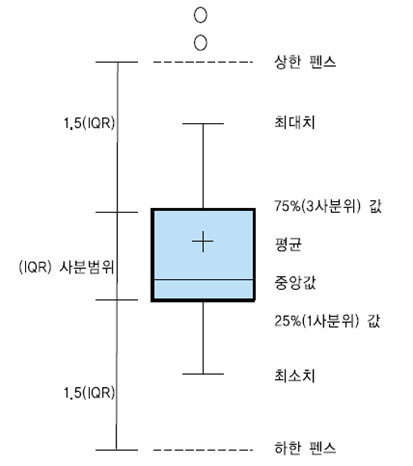

박스 플롯은 데이터의 **분포(중앙값, 사분위 범위, 이상치)**를 한눈에 확인할 수 있는 통계적 시각화 방법이다.  
특히 **데이터의 퍼짐 정도**와 **이상치(Outlier)**를 파악하는 데 유용하다.

---

## 주요 요소

- **Q1 (제1사분위수, 25%)**
  - 전체 데이터 중 하위 25% 지점의 값
- **Q3 (제3사분위수, 75%)**
  - 전체 데이터 중 상위 25% 지점의 값
- **IQR (Inter Quartile Range, 사분위 범위)**
  - `IQR = Q3 - Q1`
  - 데이터의 중간 50% 구간(분산 정도)을 나타냄
- **최소치 / 하한 펜스 (Lower Fence)**
  - `Q1 - 1.5 × IQR`
  - 이 값보다 작은 데이터는 **이상치(Outlier)**로 판단
- **최대치 / 상한 펜스 (Upper Fence)**
  - `Q3 + 1.5 × IQR`
  - 이 값보다 큰 데이터는 **이상치(Outlier)**로 판단
- **이상치 (Outlier)**
  - 하한 펜스보다 작은 값 또는 상한 펜스보다 큰 값
  - 일반적인 데이터 분포에서 벗어난 극단값

---

## 시각적 해석
- **박스(Box)**: Q1 ~ Q3 구간 (데이터의 중간 50%)
- **선(Line, Whisker)**: 하한/상한 펜스 범위 내의 최소~최대값
- **중앙선(Median Line)**: 박스 안의 중앙값(Q2, 50%)
- **점(Dots)**: 이상치 표시

---

## 활용
- 데이터의 분포 형태 파악 (대칭/비대칭 여부)
- 데이터의 변동성(분산 정도) 비교
- 여러 집단 간 분포 비교 (예: A반 vs B반 시험 점수)

---

In [14]:
# '-' 부호가 제대로 표시되게 하는 설정
plt.rcParams['axes.unicode_minus'] = False

# 운영 체제마다 한글이 보이게 하는 설정
# 윈도우
if platform.system() == 'Windows':
    path = "c:\Windows\Fonts\malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
# 맥
elif platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
# 리눅스
elif platform.system() == 'Linux':
    rc('font', family='NanumBarunGothic')

In [15]:
power.boxplot(figsize=(2,3))

<Axes: >

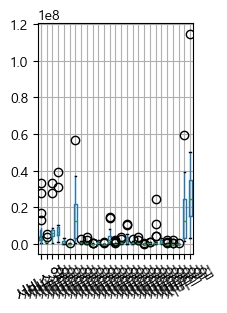

In [16]:
power[['서비스업']].boxplot(figsize=(2,3))
plt.xticks(rotation = 30)
plt.show()

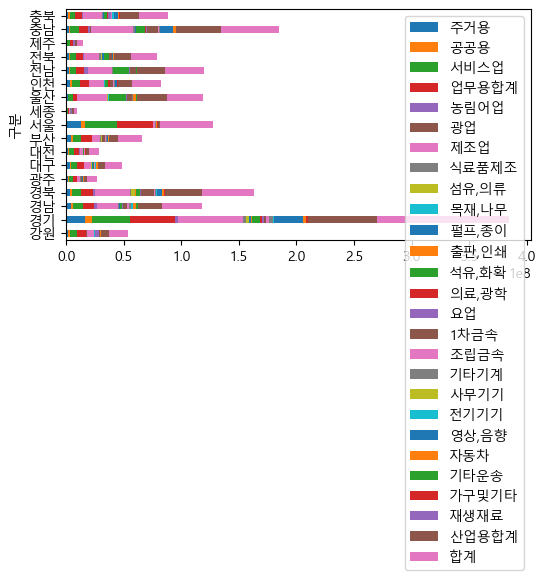

In [17]:
power.plot(kind='barh', figsize=(6,3), stacked=True)
plt.show()

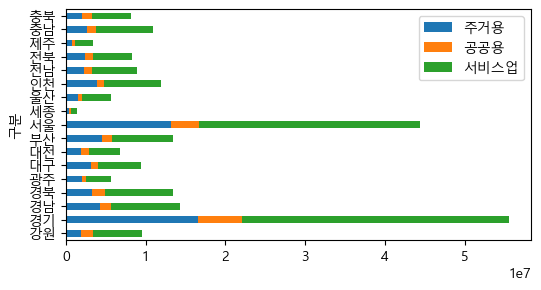

In [18]:
sample = ['주거용', '공공용', '서비스업']
power[sample].plot(kind='barh', figsize=(6,3), stacked=True)
plt.show()

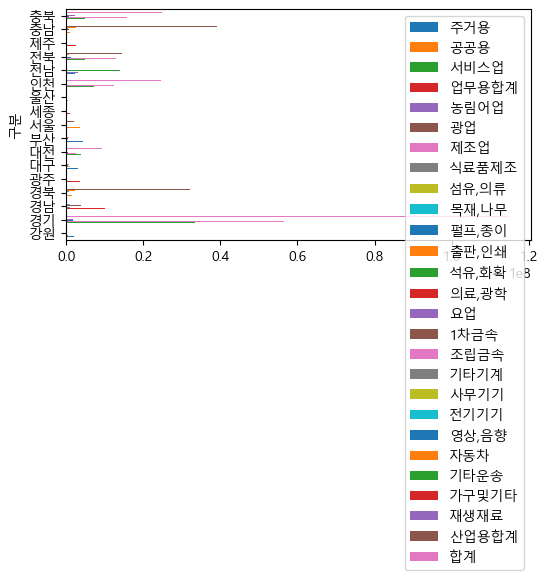

In [19]:
power.plot(kind='barh', figsize=(6,3), stacked=False)
plt.show()

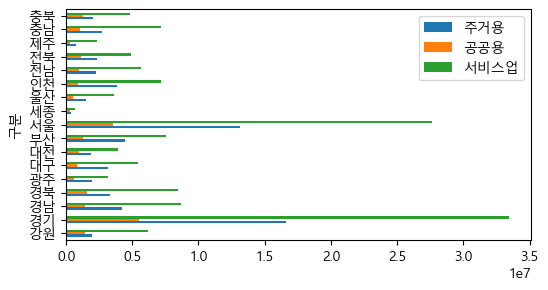

In [20]:
sample = ['주거용', '공공용', '서비스업']
power[sample].plot(kind='barh', figsize=(6,3), stacked=False)
plt.show()

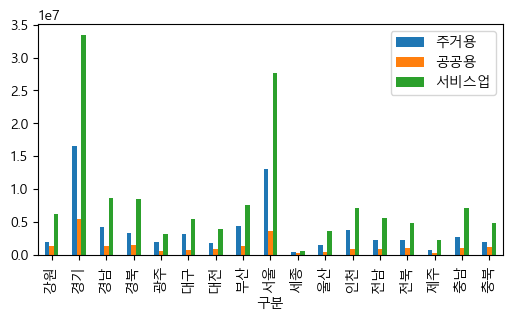

In [21]:
power[sample].plot(kind='bar', figsize=(6,3), stacked=False)
plt.show()

## barh : 가로
## bar : 세로
## stacked=True : 각 항목을 누적

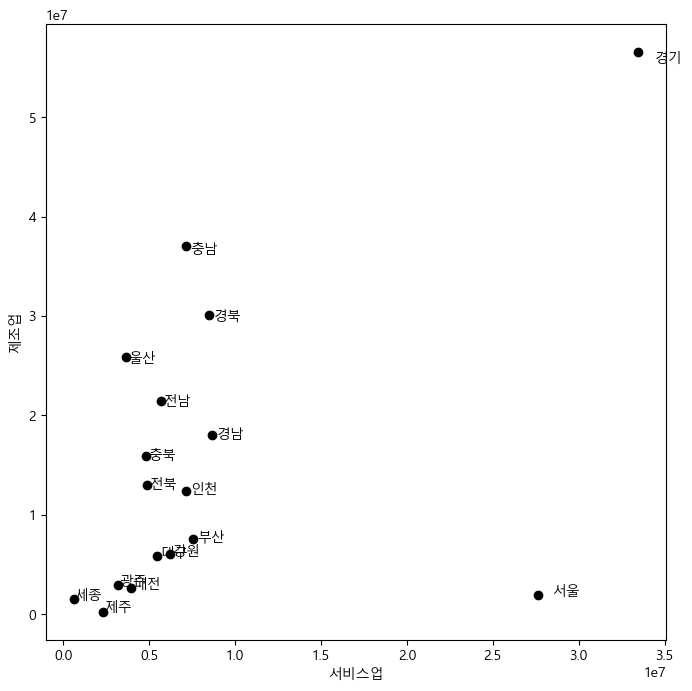

In [25]:
power = power[['서비스업','제조업']]

plt.figure(figsize=(8,8))
plt.scatter(power['서비스업'],power['제조업'],c='k',marker='o')
# scatter : 점차트 - 산포도 차트
# x에는 서비스업, y에는 제조업

plt.xlabel('서비스업') # x축 제목
plt.ylabel('제조업') # y축 제목

# plt.text(power['서비스업'][0]*3, power['제조업'][0]*3, power.index[0])
# 범례글자표시 ( x위치값,  y위치값,  표시될 글자)

for n in range(power.shape[0]):
    plt.text(power['서비스업'][n]*1.03, power['제조업'][n]*0.98, power.index[n])

plt.show()

경기와 서울이 너무 동떨어져있다 -> 문제 정의자가 판단하여 이상치로 판단 할 수 있음

In [26]:
power.shape

(17, 2)

In [27]:
power = power.drop(['경기', '서울'])
power.shape

(15, 2)

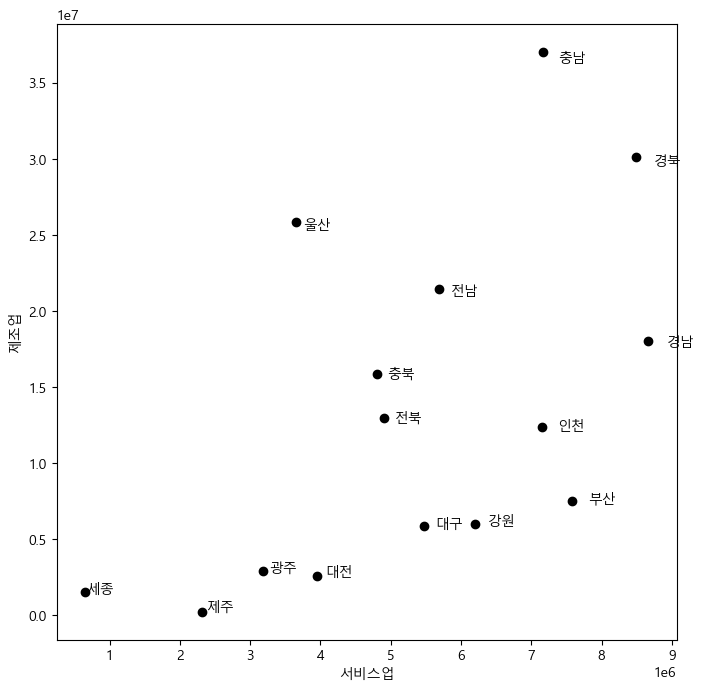

In [28]:
power = power[['서비스업','제조업']]

plt.figure(figsize=(8,8))
plt.scatter(power['서비스업'],power['제조업'],c='k',marker='o')

plt.xlabel('서비스업') 
plt.ylabel('제조업') 

for n in range(power.shape[0]):
    plt.text(power['서비스업'][n]*1.03, power['제조업'][n]*0.98, power.index[n])

plt.show()